# EDA - Exploratory Data Analysis

## importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

## Reading Algerian dataset

In [2]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
# data[0:122] -->> Bejaia Region Dataset
# data[122:124] -->> useless rows so we will drop row number 122 & 123
# data[124:246] --->>Sidi-Bel Abbes Region Dataset

In [4]:
# dropping rows
data.drop([122,123],inplace=True)

In [5]:
# reset index
data.reset_index(inplace=True)

In [6]:
# creating Region column for Bejaia Region Dataset and Sidi-Bel Abbes Region Dataset
data['Region']=0
for i in range(len(data)):
    if i<122:
        data['Region'][i]=0
    else:
        data['Region'][i]=1

In [7]:
data.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [8]:
data.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
for col in data.columns:
    data.rename(columns={col:col.strip()},inplace=True)
print(data.columns)

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [10]:
#mis-match position
data.iloc[165]

index              167
day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 165, dtype: object

In [11]:
#let's correct it
data.at[165,'DC']=14.6
data.at[165,'ISI']=9
data.at[165,'BUI']=12.5
data.at[165,'FWI']=10.4
data.at[165,'Classes']='fire'

In [12]:
data.iloc[165]

index           167
day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 165, dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5   RH           244 non-null    object
 6   Ws           244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      244 non-null    object
 15  Region       244 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 30.6+ KB


In [14]:
data.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
data.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
data[['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=data[['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
data[['Rain','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=data[['Rain','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        244 non-null    int32  
 1   day          244 non-null    int32  
 2   month        244 non-null    int32  
 3   year         244 non-null    int32  
 4   Temperature  244 non-null    int32  
 5   RH           244 non-null    int32  
 6   Ws           244 non-null    int32  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Classes      244 non-null    object 
 15  Region       244 non-null    int64  
dtypes: float64(7), int32(7), int64(1), object(1)
memory usage: 24.0+ KB


In [18]:
# we have one categorical feature
data['Classes'].unique()


array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [19]:
data['Classes']=[i.strip() for i in data.Classes]

In [20]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
data.shape

(244, 16)

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,244.0,122.500000,71.450492,0.0,60.750,122.50,184.250,245.0
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9


In [23]:
# checking the missing values
data.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [24]:
# categorical Features
#categorical_features=[ i for i in data.columns if data[i].dtypes=='object']
categorical_features=[ i for i in data.columns if data.dtypes[i]=='O']
categorical_features

['Classes']

In [25]:
# numericalfeatures
numerical_features=[feature for feature in data.columns if data[feature].dtype!= 'O']
print(numerical_features)

['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [78]:
#numerical continous feature and discrete feature
discrete_feature=['day', 'month', 'year','index','Region','Temperature']
continous_feature=[fea for fea in numerical_features if fea not in discrete_feature]

In [82]:
print(discrete_feature)
print("-"*100)
print(continous_feature)

['day', 'month', 'year', 'index', 'Region', 'Temperature']
----------------------------------------------------------------------------------------------------
['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

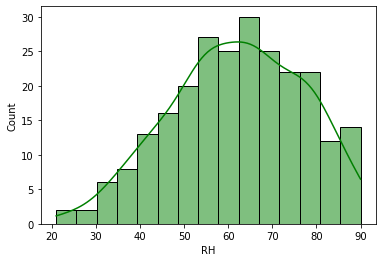

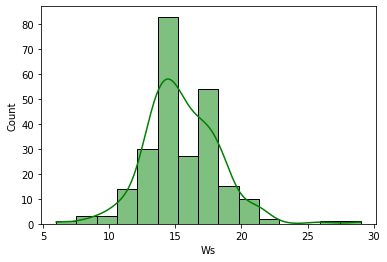

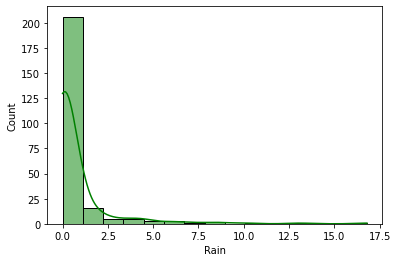

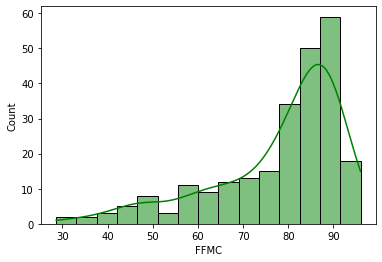

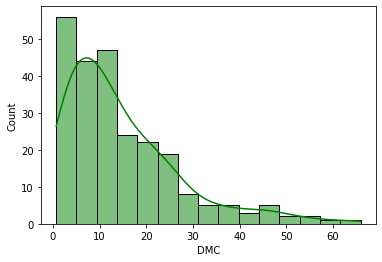

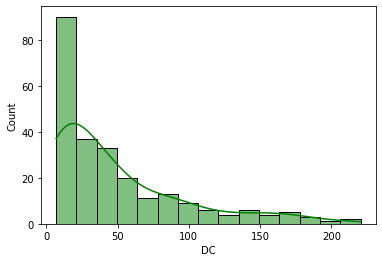

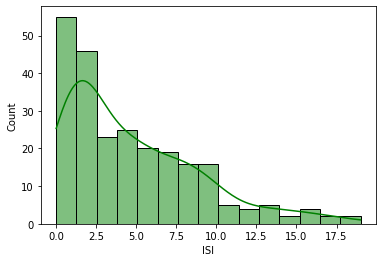

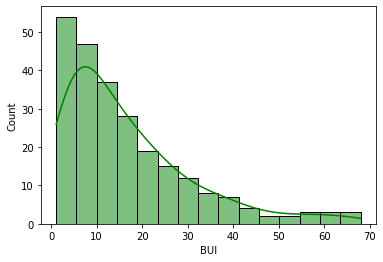

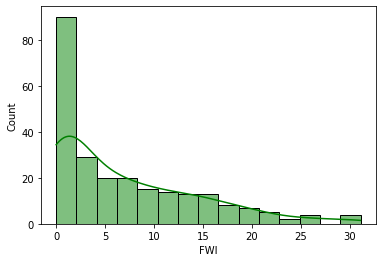

In [74]:
for i in continous_feature:
    sns.histplot(data=data,x=i,kde=True,bins=15,color='g')
    plt.show()

In [76]:
#observation
# RH follow normally distributed 
# Rain,DC,DMC,FWI,BUI,ISI,WS right skewed
# FFMC following left skewed



<AxesSubplot:xlabel='Region', ylabel='count'>

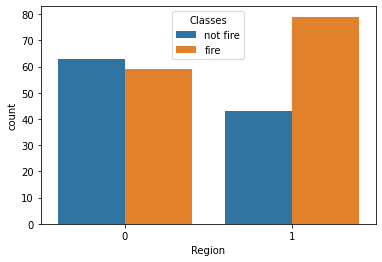

In [43]:
sns.countplot(data=data,x='Region',hue='Classes')

In [77]:
# observation based on regions
# Sidi-Bel Abbes Region has more fire 
# Bejaia Region fire and not fire approximately same

In [30]:
data['Region'].value_counts()

0    122
1    122
Name: Region, dtype: int64

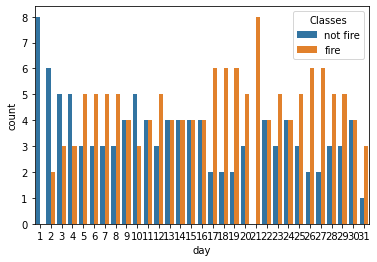

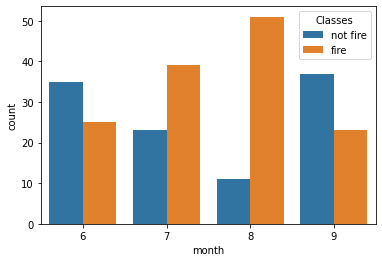

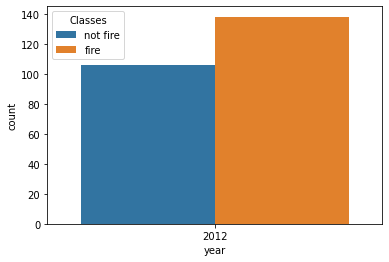

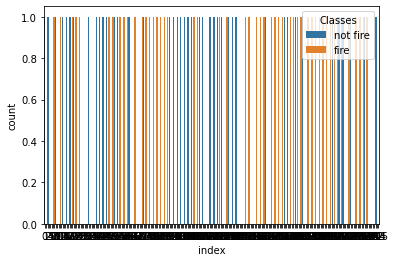

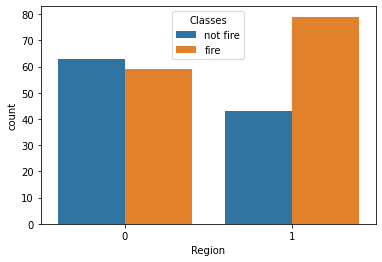

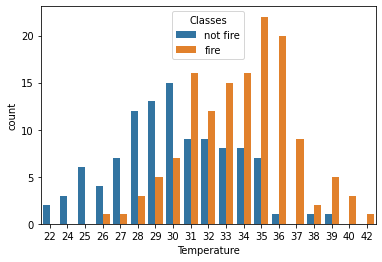

In [85]:
for i in discrete_feature:
    sns.countplot(data=data,x=i,hue='Classes')
    plt.show()

In [31]:
data.groupby('Classes')['Region'].value_counts()

Classes   Region
fire      1         79
          0         59
not fire  0         63
          1         43
Name: Region, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

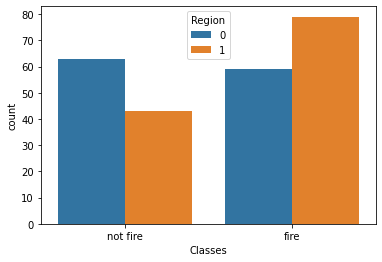

In [32]:
sns.countplot(data=data,x='Classes',hue='Region')

In [90]:
data.corr()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
index,1.000000,1.234134e-01,4.782196e-01,NaN,0.219836,-0.380075,-0.168174,-0.032159,0.229225,0.258296,0.054404,0.283137,0.180165,0.253889,8.695173e-01
day,0.123413,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,4.662229e-16
month,0.478220,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-9.586232e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.219836,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01
RH,-0.380075,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01
Ws,-0.168174,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01
Rain,-0.032159,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02
FFMC,0.229225,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01
DMC,0.258296,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01


<AxesSubplot:>

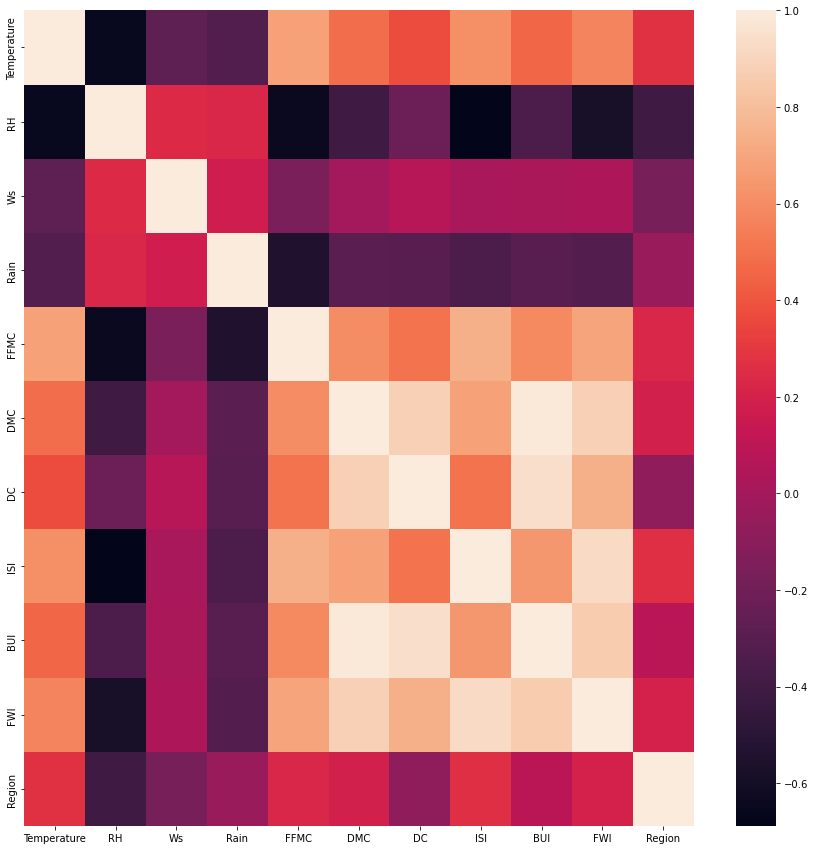

In [95]:
DATA=data[[fea for fea in numerical_features if fea not in ['day', 'month', 'year', 'index']]].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(DATA)

In [36]:
data.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<AxesSubplot:xlabel='month', ylabel='count'>

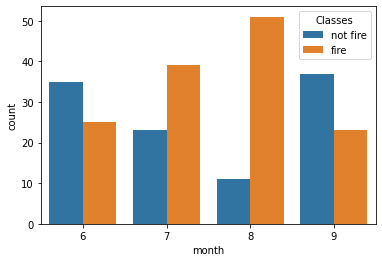

In [39]:
sns.countplot(data=data,x='month',hue='Classes')

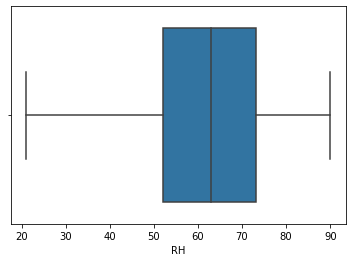

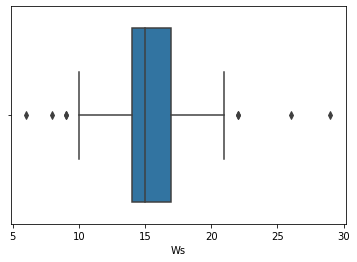

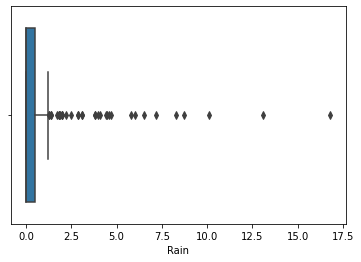

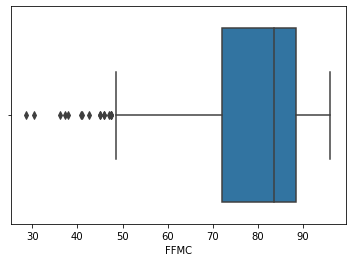

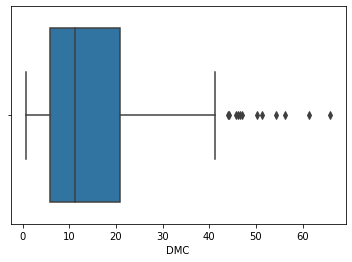

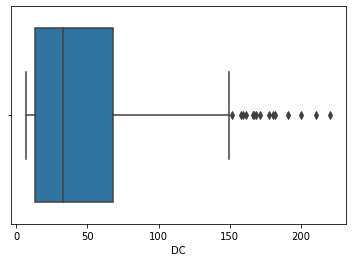

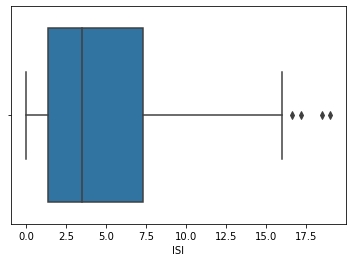

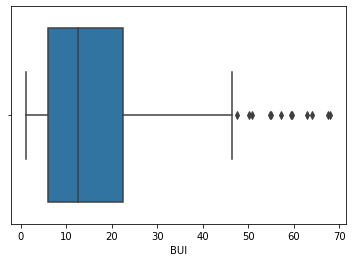

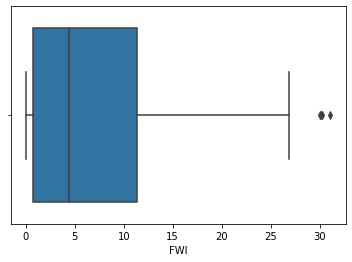

In [88]:
for i in continous_feature:
    sns.boxplot(data=data,x=i,hue='Classes')
    plt.show()

## FINAL REPORT

# Observation on univariate analysis
 
1. Relative Humidity is following gaussian distribution.
2. Rain , DMC , DC, ISI , BUI , FWI are following right skewed distribution(log-Normal-distribution)
3. FFMC feature following left skewed distribution.
 
# Obersvation on bivariate analysis 
 
1. Day vs Classes : almost everday the occurance of fire is visible, and the count of fire is greater or equal to not fire count.
2. Month vs Classes : Occurance of fire is high in July and August, as compare to June and september. 
3. Year vs Classes : Occurance of fire is high in 2012.
4. Temperature vs Classes : If the Temperature in between in 36 to 37. then there is high chances for fire occured. 
5. Ws(Wind speed) vs Classes : if the Wind speed in between 13 to 19. then there is high chances for fire occured.
6. Region vs Classes : Sidi Bel abbes region has more fire casses.
 
# Obesrvation on Outlier 
 
Feature having outlier : Rain , FFMC ,DMC , DC, ISI, BUI, FWI
 
# Obesrvation Heat map

1. correlation coefficients between 0.8 to to 1 | very high correlated.
2. correlation coefficients between 0.6 to 0.8  | high correlated.
3. correlation coefficients between 0.4 to 0.6  | modreate correlated. 
4. correlation coefficients between 0.2 to 0.4  | less correalted. 
 
## Very High Correlated :  DMC-BUI , DC-BUI , FWI- BUI
## High correlated  :  FFMC-BUI , ISI-BUI, DC-ISI